In [2]:
import pandas as pd
from collections import Counter
import pprint
import pickle

def dump(obj,filename):
    filehandler = open(filename,"wb")
    pickle.dump(obj,filehandler)
    filehandler.close()

def load(filename):
    file = open(filename,'rb')
    obj = pickle.load(file)
    file.close()
    return obj

In [3]:
from collections import Counter
def get_most_common(df, colname):
    count_dict = Counter(df[colname])
    return count_dict.most_common(100)

#### load data and merge

In [29]:
df_r = load('../dumps/df_sel_entities_sentiment_category.pkl')
print(df.shape)
print(type(df))
print(df.columns)

(18340, 19)
<class 'pandas.core.frame.DataFrame'>
Index(['Unnamed: 0', 'index', 'Sound Bite Text', 'Title', 'Post Type',
       'Media Type', 'Source Type', 'Domain', 'Richness', 'Interests',
       'Positive Objects', 'Negative Objects', 'Topic_top', 'Topic_id',
       'Topic_raw', 'Topic_name', 'entities', 'Sentiment', 'Category'],
      dtype='object')


In [34]:
df = pd.read_csv('../dumps/conversation_tagged_names.csv')
print(df.shape)
print(type(df))
print(df.columns)

(18340, 16)
<class 'pandas.core.frame.DataFrame'>
Index(['Unnamed: 0', 'index', 'Sound Bite Text', 'Title', 'Post Type',
       'Media Type', 'Source Type', 'Domain', 'Richness', 'Interests',
       'Positive Objects', 'Negative Objects', 'Topic_top', 'Topic_id',
       'Topic_raw', 'Topic_name'],
      dtype='object')


In [35]:
df = pd.concat([df,df_r.loc[:,'entities']],axis=1)
df = pd.concat([df,df_r.loc[:,'Sentiment']],axis=1)
df = pd.concat([df,df_r.loc[:,'Category']],axis=1)
df.head(2)

,Unnamed: 0,index,Sound Bite Text,Title,Post Type,Media Type,Source Type,Domain,Richness,Interests,Positive Objects,Negative Objects,Topic_top,Topic_id,Topic_raw,Topic_name,entities,Sentiment,Category
0,0,0,"Mobile & Apps FILE - In this July 9, 2015, fil...",PepsiCo beats 3Q profit forecasts,Original,No Media,Blogs,mercedsunstar.com,1.0,NaN,NaN,NaN,14_french_ban_dinner.png,6,6:0.987499999972,14_french_ban_dinner.png,elise amendola_file ap_the associated press_mo...,0.147243,Pepsi
1,1,1,"Mobile & Apps FILE - In this July 9, 2015, fil...",PepsiCo beats 3Q profit forecasts,Original,No Media,Blogs,mercedsunstar.com,1.0,NaN,NaN,NaN,14_french_ban_dinner.png,6,6:0.989080459742,14_french_ban_dinner.png,elise amendola_file ap_the associated press_mo...,0.137346,Pepsi


#### For topics the split should be done with " " instead of "_"

In [36]:
df.loc[:5,'Topic_name']

0                             14_french_ban_dinner.png
1                             14_french_ban_dinner.png
2    7_sports.png 4_people_opinions_random.png 11_c...
3    11_colege_random.png 7_sports.png coke_executi...
4    11_colege_random.png 13_media_brand_advertisem...
5    15_share_sales.png 12_customers_opinion_coke_p...
Name: Topic_name, dtype: object

In [38]:
df_pepsi = df[df['Category']=='Pepsi']
df_coke = df[df['Category']=='Coke']
cokeEntitySet = set([]);
pepsiEntitySet = set([]);

for entry in df_coke.loc[:,'Topic_name']:
    temp = entry.split(" ")
    for t in temp:
        cokeEntitySet.add(str(t))
for entry in df_pepsi.loc[:,'Topic_name']:
    temp = entry.split(" ")
    for t in temp:
        pepsiEntitySet.add(str(t))

commonEntitySet = list(cokeEntitySet.intersection(pepsiEntitySet))
print(commonEntitySet)

['0_Business.png', 'coke_executive.png', '5_endorsements.png', '12_customers_opinion_coke_pepsi.png', '6_earnings_profit.png', '11_colege_random.png', '13_media_brand_advertisements.png', '8_coke_bottle.png', '15_share_sales.png', '19_random_blogs.png', '2_Vegas_politics_controversy.png', '16_pepsi_endorsements_johnson.png', '7_sports.png', '.DS_Store', '4_people_opinions_random.png', '9_cocola_water_sparling_topo_chico.png', '3_branding_business.png', '1_Ad_controversy_pepsi.png', '10_Pepsi_center_wwe.png', '14_french_ban_dinner.png']


In [40]:
df2 = df.loc[:,'Topic_name']
df2.head()
list2 = list(df2)
print(list2[:5])

['14_french_ban_dinner.png', '14_french_ban_dinner.png', '7_sports.png 4_people_opinions_random.png 11_colege_random.png 8_coke_bottle.png', '11_colege_random.png 7_sports.png coke_executive.png 8_coke_bottle.png', '11_colege_random.png 13_media_brand_advertisements.png 4_people_opinions_random.png']


In [41]:
container = []
for i in list2:
    i = i.split(" ")
    container.extend(i)

In [42]:
from collections import Counter
def get_most_common(lista):
    count_dict = Counter(lista)
    return count_dict

countDict = get_most_common(container)
commonEntityDict = {};

for entity in commonEntitySet:
    commonEntityDict[entity]=countDict[entity]
print(commonEntityDict)

{'0_Business.png': 4422, 'coke_executive.png': 3058, '5_endorsements.png': 3973, '12_customers_opinion_coke_pepsi.png': 7319, '6_earnings_profit.png': 5737, '11_colege_random.png': 7062, '13_media_brand_advertisements.png': 6258, '8_coke_bottle.png': 3995, '15_share_sales.png': 5348, '19_random_blogs.png': 4859, '2_Vegas_politics_controversy.png': 5200, '16_pepsi_endorsements_johnson.png': 4590, '7_sports.png': 4393, '.DS_Store': 5737, '4_people_opinions_random.png': 5398, '9_cocola_water_sparling_topo_chico.png': 7901, '3_branding_business.png': 4836, '1_Ad_controversy_pepsi.png': 5416, '10_Pepsi_center_wwe.png': 4821, '14_french_ban_dinner.png': 4206}


In [43]:
commonEntityDict['']=0
mostCommonEntities = Counter(commonEntityDict).most_common(20)
entList = [];
for ent, count in mostCommonEntities:
    entList.append(ent)
print(mostCommonEntities)
print(entList)

[('9_cocola_water_sparling_topo_chico.png', 7901), ('12_customers_opinion_coke_pepsi.png', 7319), ('11_colege_random.png', 7062), ('13_media_brand_advertisements.png', 6258), ('6_earnings_profit.png', 5737), ('.DS_Store', 5737), ('1_Ad_controversy_pepsi.png', 5416), ('4_people_opinions_random.png', 5398), ('15_share_sales.png', 5348), ('2_Vegas_politics_controversy.png', 5200), ('19_random_blogs.png', 4859), ('3_branding_business.png', 4836), ('10_Pepsi_center_wwe.png', 4821), ('16_pepsi_endorsements_johnson.png', 4590), ('0_Business.png', 4422), ('7_sports.png', 4393), ('14_french_ban_dinner.png', 4206), ('8_coke_bottle.png', 3995), ('5_endorsements.png', 3973), ('coke_executive.png', 3058)]
['9_cocola_water_sparling_topo_chico.png', '12_customers_opinion_coke_pepsi.png', '11_colege_random.png', '13_media_brand_advertisements.png', '6_earnings_profit.png', '.DS_Store', '1_Ad_controversy_pepsi.png', '4_people_opinions_random.png', '15_share_sales.png', '2_Vegas_politics_controversy.png

In [44]:
aveSentList = [];
for targetEnt in entList:
    i=0;
    sentSum=0;
    for index, row in df_pepsi.iterrows():
        ent = row['Topic_name'].split(" ")
        for e in ent:
            #break if any of the entities match the popular entity list
            if e == targetEnt:
                sentSum = sentSum+ row['Sentiment']
                i = i+1
                break
    aveSentList.append([targetEnt,{'Pepsi': sentSum/i, 'Coke': 0}])
print(aveSentList)
#coke rows: df_coke

[['9_cocola_water_sparling_topo_chico.png', {'Pepsi': 0.0813658976662094, 'Coke': 0}], ['12_customers_opinion_coke_pepsi.png', {'Pepsi': 0.05751745908587329, 'Coke': 0}], ['11_colege_random.png', {'Pepsi': 0.0797634200441319, 'Coke': 0}], ['13_media_brand_advertisements.png', {'Pepsi': 0.048411883558503385, 'Coke': 0}], ['6_earnings_profit.png', {'Pepsi': 0.10652159525320644, 'Coke': 0}], ['.DS_Store', {'Pepsi': 0.06204431453948529, 'Coke': 0}], ['1_Ad_controversy_pepsi.png', {'Pepsi': 0.05419710869539481, 'Coke': 0}], ['4_people_opinions_random.png', {'Pepsi': 0.05329321211162141, 'Coke': 0}], ['15_share_sales.png', {'Pepsi': 0.07292851312029935, 'Coke': 0}], ['2_Vegas_politics_controversy.png', {'Pepsi': 0.05559943226692916, 'Coke': 0}], ['19_random_blogs.png', {'Pepsi': 0.08889991447898626, 'Coke': 0}], ['3_branding_business.png', {'Pepsi': 0.06720408591089755, 'Coke': 0}], ['10_Pepsi_center_wwe.png', {'Pepsi': -0.03173812586851365, 'Coke': 0}], ['16_pepsi_endorsements_johnson.png',

In [45]:
for targetEnt in entList:
    i=0;
    sentSum=0;
    for index, row in df_coke.iterrows():
        ent = row['Topic_name'].split(" ")
        for e in ent:
            #break if any of the entities match the popular entity list
            if e == targetEnt:
                sentSum = sentSum+ row['Sentiment']
                i = i+1
                break
    aveSentList[entList.index(targetEnt)][1]['Coke'] = sentSum/i
print(aveSentList)

[['9_cocola_water_sparling_topo_chico.png', {'Pepsi': 0.0813658976662094, 'Coke': 0.13707989855742736}], ['12_customers_opinion_coke_pepsi.png', {'Pepsi': 0.05751745908587329, 'Coke': 0.1224677558131042}], ['11_colege_random.png', {'Pepsi': 0.0797634200441319, 'Coke': 0.16104602592061493}], ['13_media_brand_advertisements.png', {'Pepsi': 0.048411883558503385, 'Coke': 0.14168210378214868}], ['6_earnings_profit.png', {'Pepsi': 0.10652159525320644, 'Coke': 0.1482274968056574}], ['.DS_Store', {'Pepsi': 0.06204431453948529, 'Coke': 0.1524013695453991}], ['1_Ad_controversy_pepsi.png', {'Pepsi': 0.05419710869539481, 'Coke': 0.13725868239393865}], ['4_people_opinions_random.png', {'Pepsi': 0.05329321211162141, 'Coke': 0.14502929029450706}], ['15_share_sales.png', {'Pepsi': 0.07292851312029935, 'Coke': 0.16660468677492785}], ['2_Vegas_politics_controversy.png', {'Pepsi': 0.05559943226692916, 'Coke': 0.149948360663177}], ['19_random_blogs.png', {'Pepsi': 0.08889991447898626, 'Coke': 0.1757519302

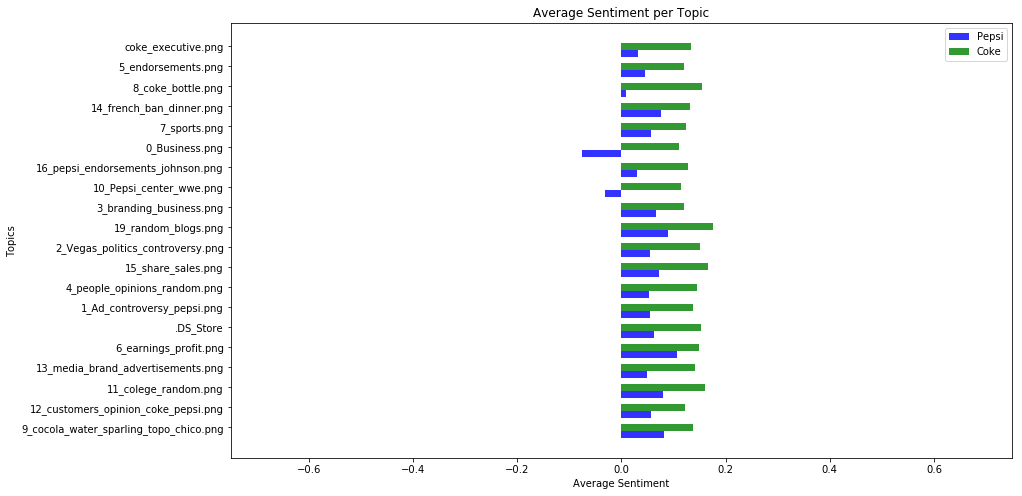

In [46]:
import numpy as np
import matplotlib.pyplot as plt
pepsi=[];
coke=[];
for i in range(0,20):
    pepsi.append(aveSentList[i][1]['Pepsi'])
    coke.append(aveSentList[i][1]['Coke'])

index = np.arange(20)
bar_width = 0.35
opacity = 0.8

plt.figure(1, figsize=(14, 8))
rect1= plt.barh(index,pepsi,bar_width,alpha=opacity,color='b',label='Pepsi')
rect2 = plt.barh(index+bar_width,coke,bar_width,alpha=opacity,color='g',label='Coke')
plt.xlim([-0.75,0.75])
plt.yticks(index+bar_width,entList)
plt.ylabel('Topics')
plt.xlabel('Average Sentiment')
plt.title('Average Sentiment per Topic')
plt.legend()
plt.show()